In [3]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import BayesianRidge
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import numpy as np
from common_utils import retrieveDataset, normalize_data
from polyssifier import polyr
import matplotlib.pyplot as plt


# SMRI Dataset

In [4]:
dataset = retrieveDataset( data = 'SMRI', subset='FTPC')

In [1]:
def plot_distribution(dataType, target_name, scaling_method='log', bins=80):
    """
    Plots histograms of the target variable before and after scaling.

    Parameters:
    - dataset: the dataset containing target data
    - target_name: name of the target (e.g., 'c0b')
    - scaling_method: method for scaling ('log', 'std', or 'minmax')
    - bins: number of bins for the histograms
    """

    dataset = retrieveDataset( data = dataType, subset='FTPC')
    # Assuming dataset[target_name][0] contains X and dataset[target_name][1] contains y
    X, y = dataset[target_name][0], dataset[target_name][1]

    # Store original y values for the first plot
    y_original = np.array(y, dtype=np.float32).ravel()

    # Apply the selected scaling method
    if scaling_method == 'log':
        y_scaled = np.log(y+1)
    elif scaling_method == 'std':
        y_scaled = (y - np.mean(y)) / np.std(y)
    elif scaling_method == 'minmax':
        y_min = np.min(y)
        y_max = np.max(y)
        y_scaled = (y - y_min) / (y_max - y_min) * 2 - 1  # Scale between -1 and 1
    else:
        raise ValueError("Invalid scaling method. Choose 'log', 'std', or 'minmax'.")

    # Convert y_scaled to numpy array after scaling
    y_scaled = np.array(y_scaled, dtype=np.float32).ravel()

    # Plot histograms before and after scaling
    plt.figure(figsize=(14, 6))

    # Histogram before scaling
    plt.subplot(1, 2, 1)
    plt.hist(y_original, bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {target_name} Before Scaling')
    plt.xlabel('Target values')
    plt.ylabel('Frequency')
    plt.grid(True)

    # Histogram after scaling
    plt.subplot(1, 2, 2)
    plt.hist(y_scaled, bins=bins, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {target_name} After Scaling ({scaling_method} scaling)')
    plt.xlabel('Target values')
    plt.ylabel('Frequency')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

## C0b 

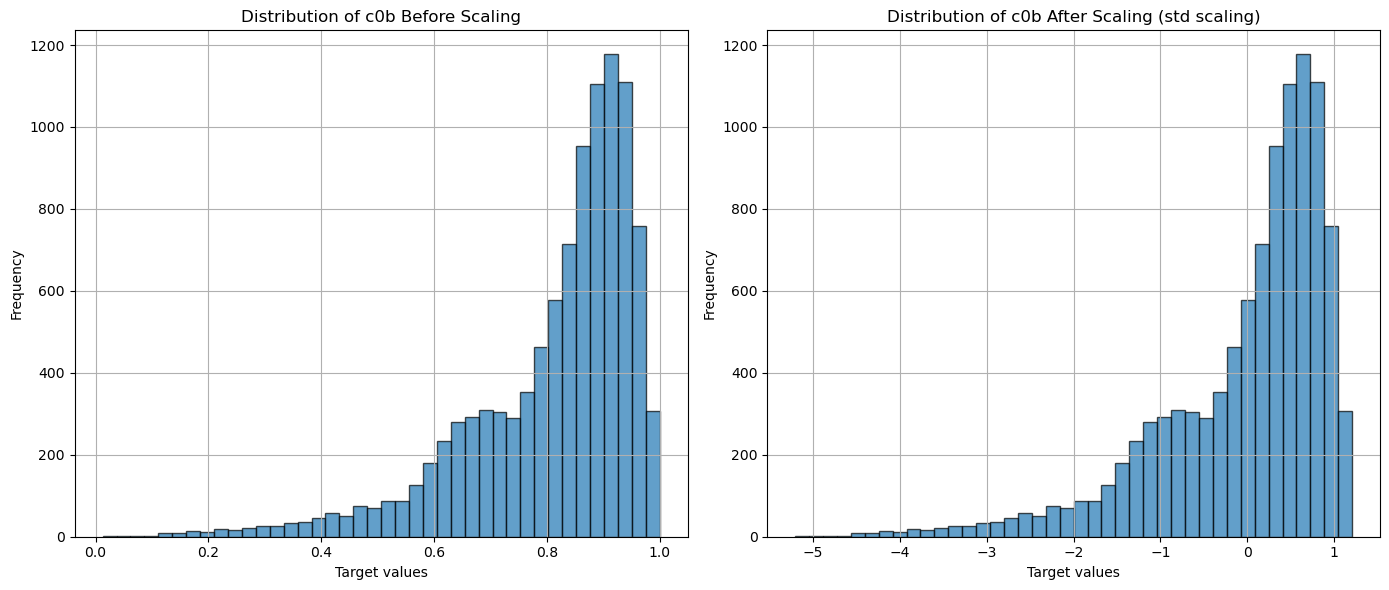

In [8]:
plot_distribution('SMRI', 'c0b', 'std', bins = 40 )

(8299, 341)
(8475, 341)
(5869, 341)
Before scaling c0b:
Mean: 0.8222918423906496
Standard deviation: 0.14887607980443332
After scaling c0b with method 'std':
Mean: 7.3940214e-09
Standard deviation: 1.0


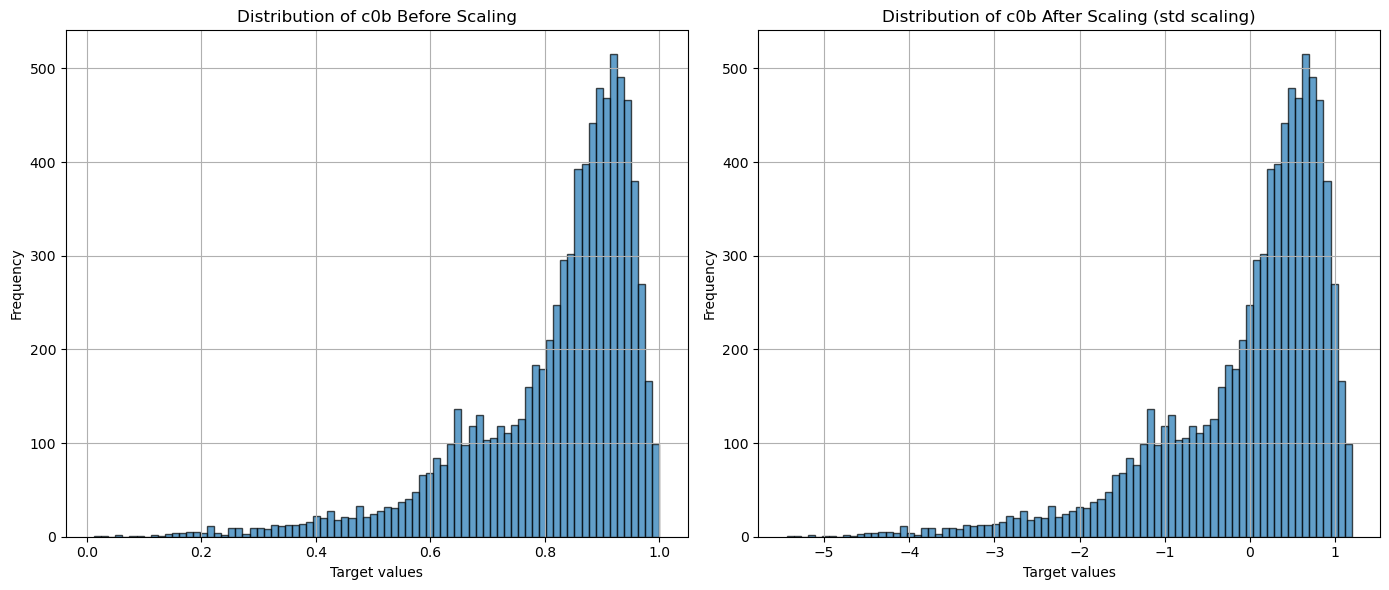

In [38]:
plot_distribution('DTI', 'c0b', 'std', bins = 80 )

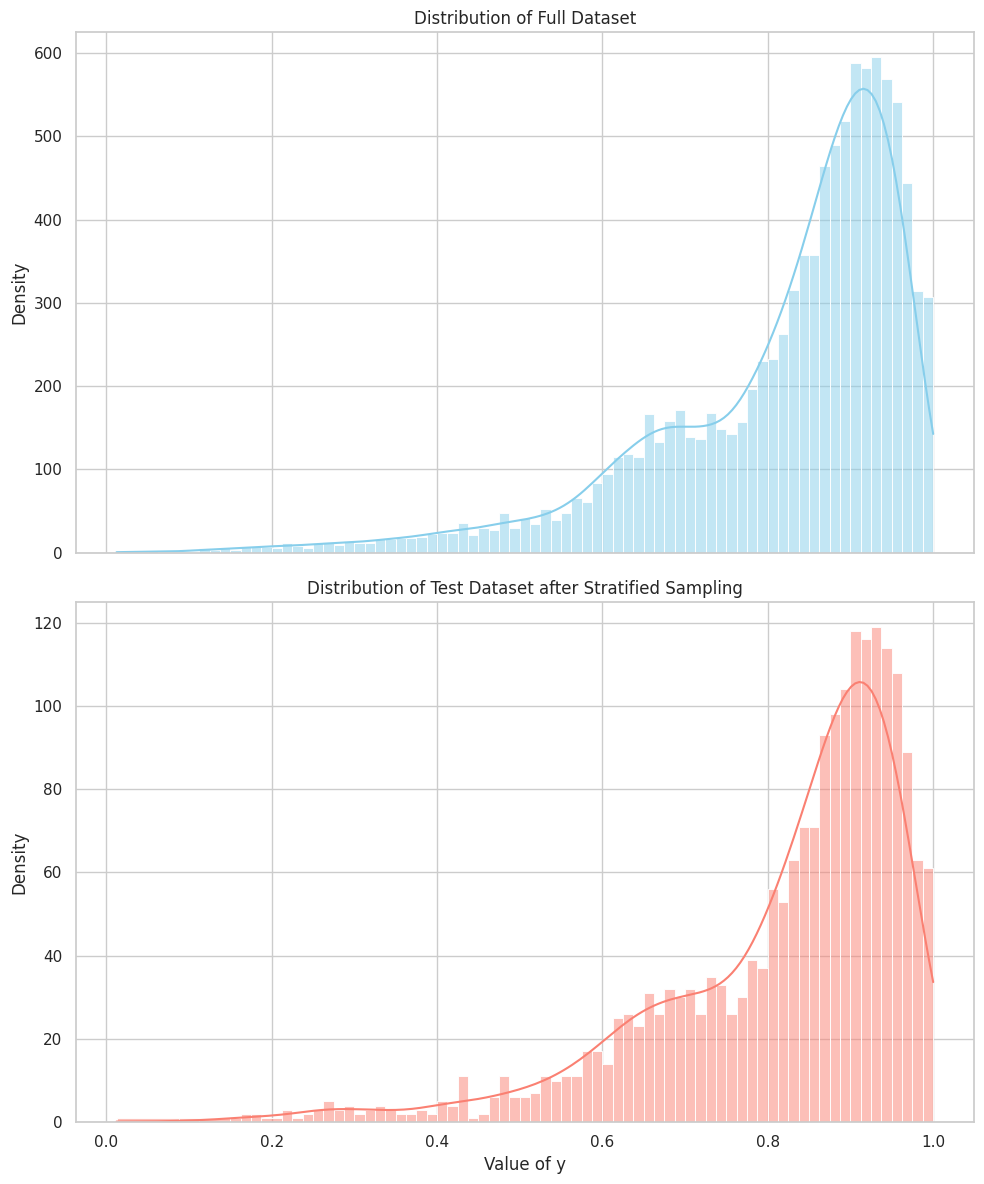

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import torch

def plot_distribution_with_stratified_sampling(dataType, target_name, num_bins):
    """
    Plots the distribution of the target variable before and after stratified sampling.
    
    Parameters:
        y_tensor (torch.Tensor): The target variable tensor.
        num_bins (int): The number of quantile bins to use for stratified sampling.
    
    """
    dataset = retrieveDataset( data = dataType, subset='FTPC')
    # Assuming dataset[target_name][0] contains X and dataset[target_name][1] contains y
    X, y = dataset[target_name][0], dataset[target_name][1]
    
    
    sns.set(style="whitegrid")
    
    # Convert the tensor to a NumPy array
    y_np = y.squeeze().to_numpy()

    # Calculate quantile bins
    try:
        y_binned, bins = pd.qcut(y_np, q=30, duplicates='drop', retbins=True)
    except ValueError as e:
        print(f"Error in binning: {e}")
        return

    # Perform stratified sampling
    from sklearn.model_selection import train_test_split
    _, y_test = train_test_split(y_np, test_size=0.2, stratify=y_binned, random_state=42)
    
    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 12), sharex=True)
    
    # Plot the original full dataset distribution
    sns.histplot(y_np, bins=np.unique(y_np), kde=True, color='skyblue', ax=ax[0])
    ax[0].set_title('Distribution of Full Dataset')
    ax[0].set_xlabel('Value of y')
    ax[0].set_ylabel('Density')
    
    # Plot the test dataset distribution
    sns.histplot(y_test, bins=np.unique(y_test), kde=True, color='salmon', ax=ax[1])
    ax[1].set_title('Distribution of Test Dataset after Stratified Sampling')
    ax[1].set_xlabel('Value of y')
    ax[1].set_ylabel('Density')
    
    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

# Example usage assuming `y_tensor` is available as a PyTorch tensor
# y_tensor = torch.randn(1000) * 50 + 100  # Simulated data
# plot_distribution_with_stratified_sampling(y_tensor, num_bins=40)



plot_distribution_with_stratified_sampling('SMRI', 'c0b', 10)

## C2B 

(10241, 335)
(10537, 335)
(6928, 335)
Before scaling c2b:
Mean: 0.7437091104384338
Standard deviation: 0.14591126866826717
After scaling c2b with method 'std':
Mean: -2.6074485e-09
Standard deviation: 1.0


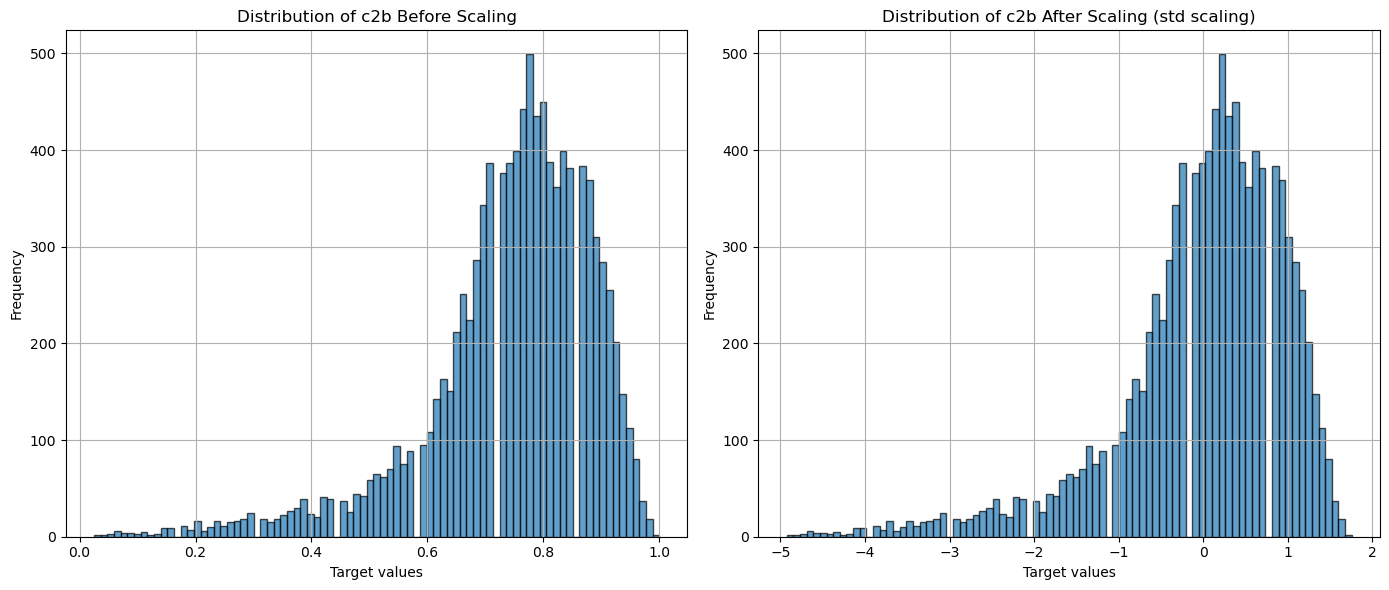

In [28]:
plot_distribution('SMRI', 'c2b', 'std', bins = 85 )

## CBCL

(10241, 335)
(10537, 335)
(6928, 335)
Before scaling cbcl:
Mean: 2.949701053430768
Standard deviation: 3.479237097539969
After scaling cbcl with method 'std':
Mean: -8.326662e-09
Standard deviation: 1.0


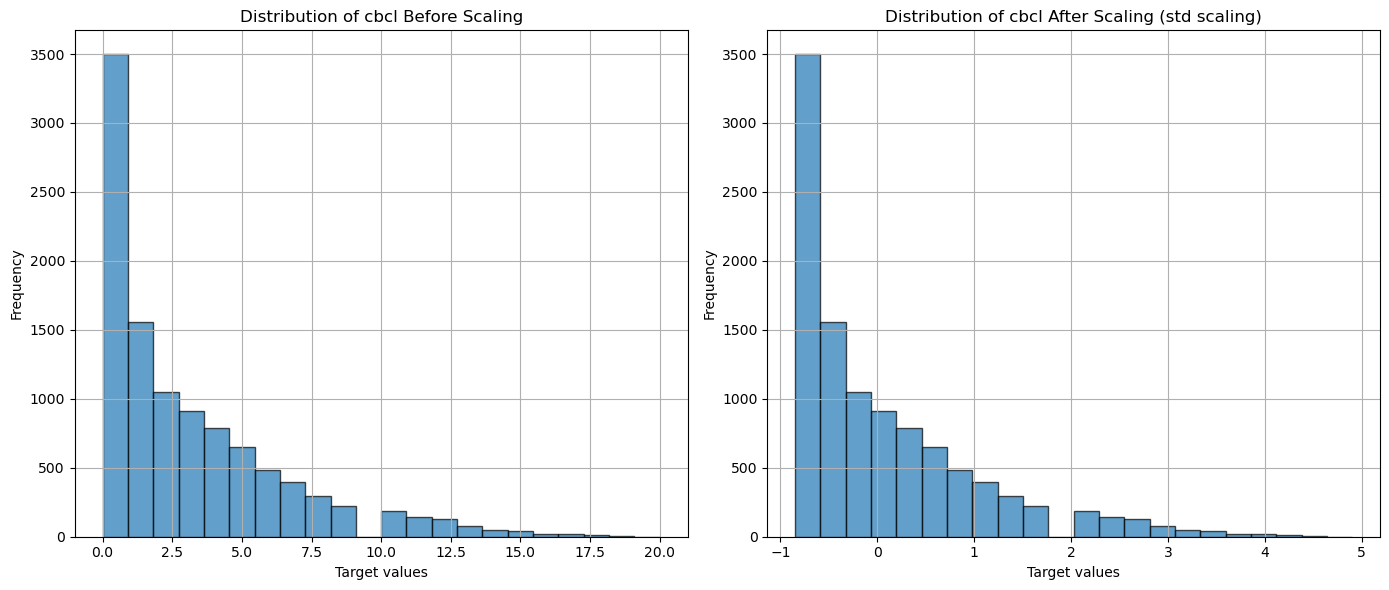

In [29]:
plot_distribution('SMRI', 'cbcl', 'log', bins = 22 )

## PCA1 

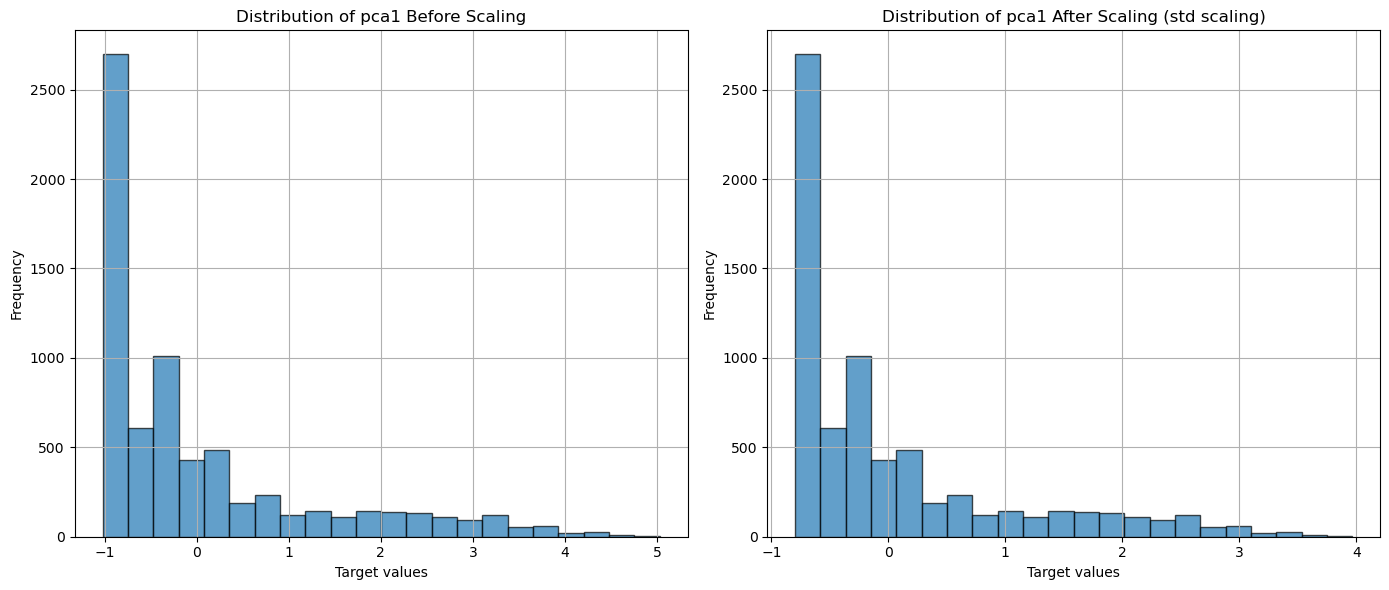

In [6]:
plot_distribution('SMRI', 'pca1', 'std', bins = 22 )

# DTI

## C0b

(8299, 341)
(8475, 341)
(5869, 341)
Before scaling c0b:
Mean: 0.8222918423906496
Standard deviation: 0.14887607980443332
After scaling c0b with method 'std':
Mean: 7.3940214e-09
Standard deviation: 1.0


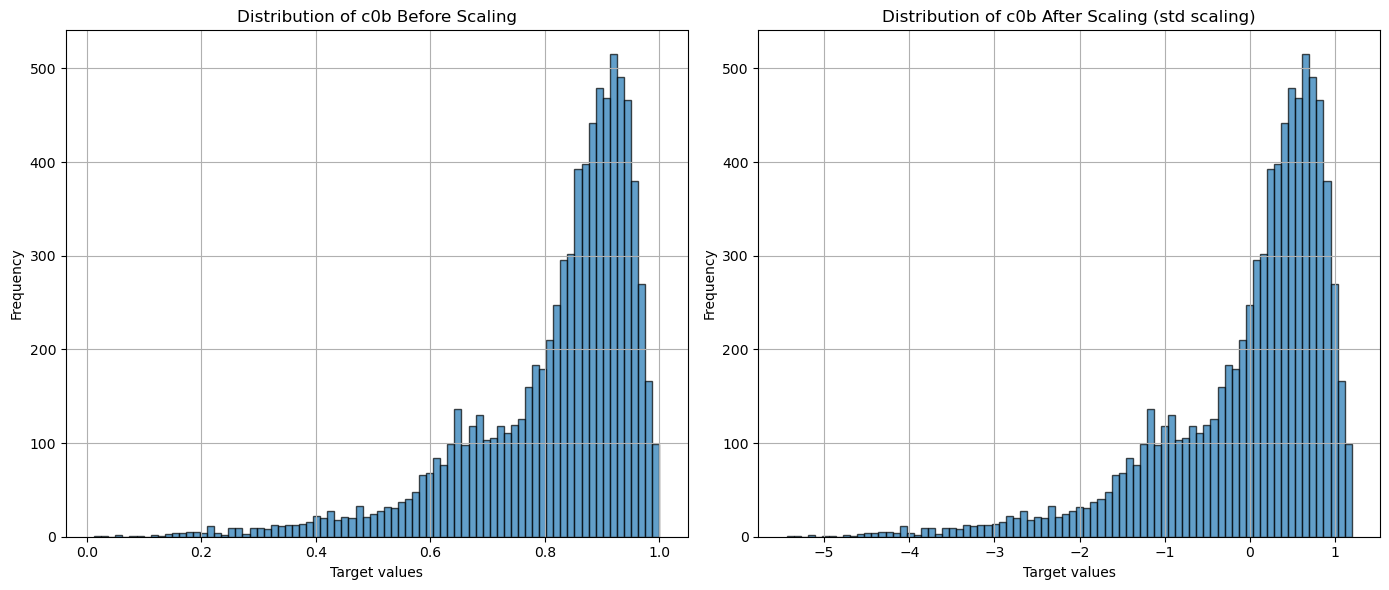

In [31]:
plot_distribution('DTI', 'c0b', 'std', bins = 80 )

## C2b

(8299, 341)
(8475, 341)
(5869, 341)
Before scaling c2b:
Mean: 0.7511100735028317
Standard deviation: 0.14172400864214857
After scaling c2b with method 'std':
Mean: 1.264058e-09
Standard deviation: 1.0


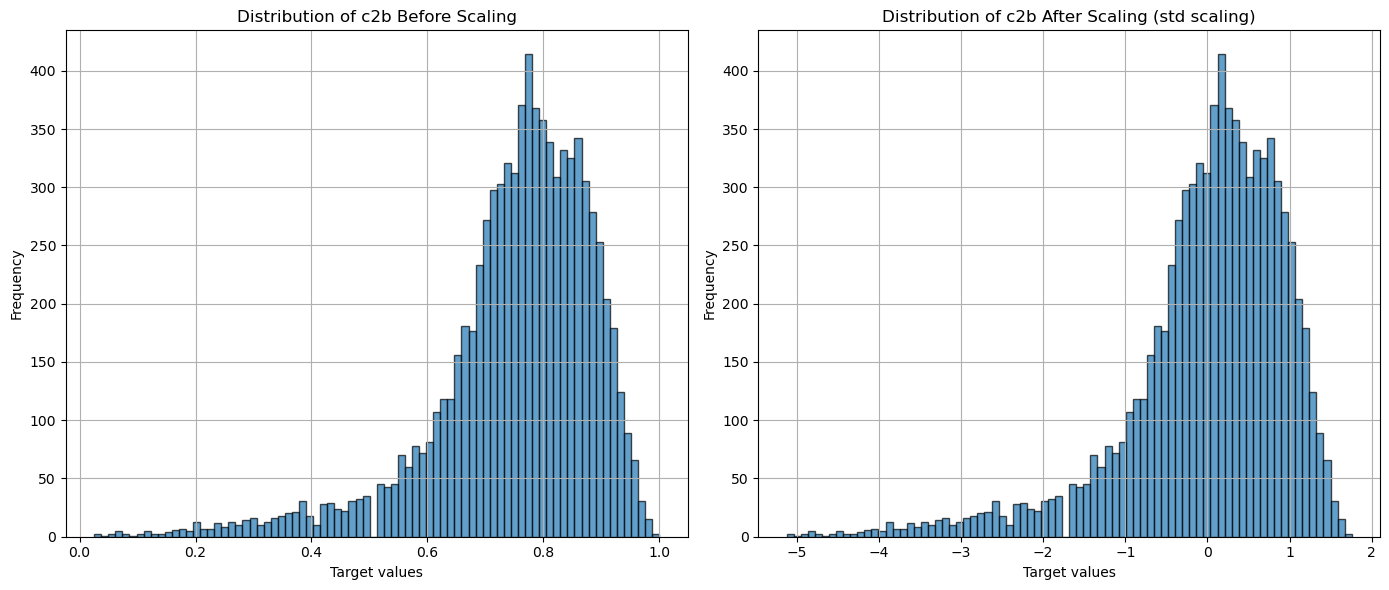

In [34]:
plot_distribution('DTI', 'c2b', 'std', bins = 80 )

## CBCL

(8299, 341)
(8475, 341)
(5869, 341)
Before scaling cbcl:
Mean: 2.8658407079646016
Standard deviation: 3.4396003898539163
After scaling cbcl with method 'std':
Mean: 1.0577627e-08
Standard deviation: 1.0


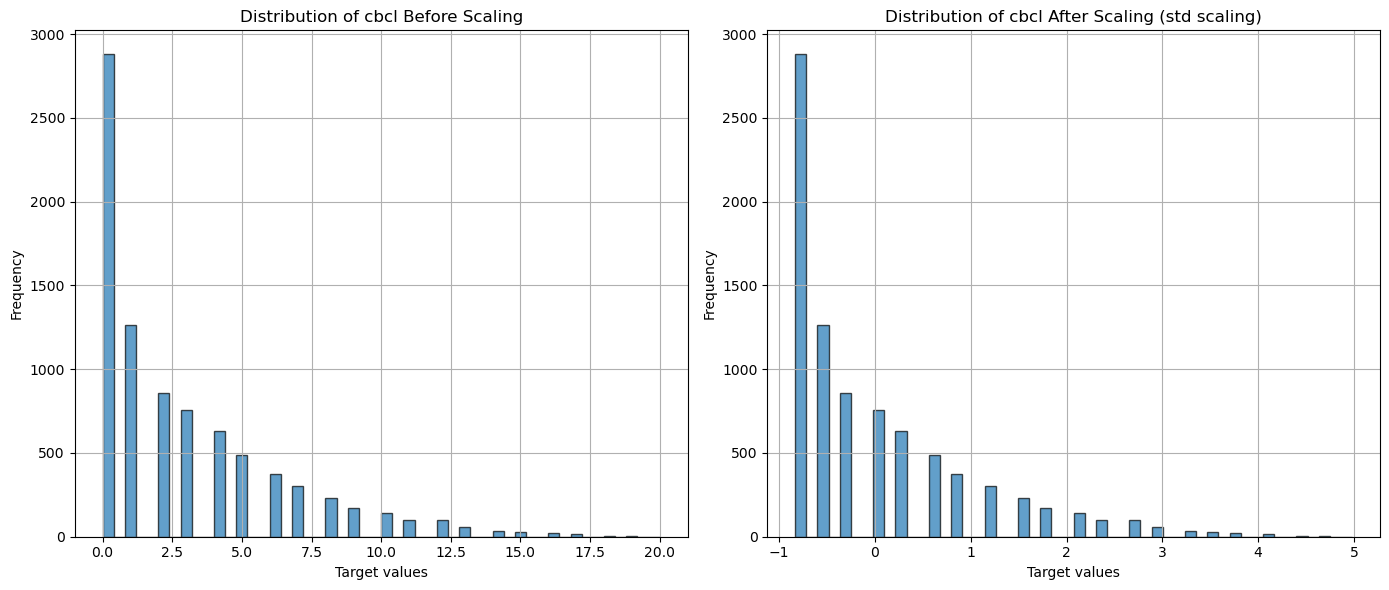

In [37]:
plot_distribution('DTI', 'cbcl', 'std', bins = 50 )

## PCA1

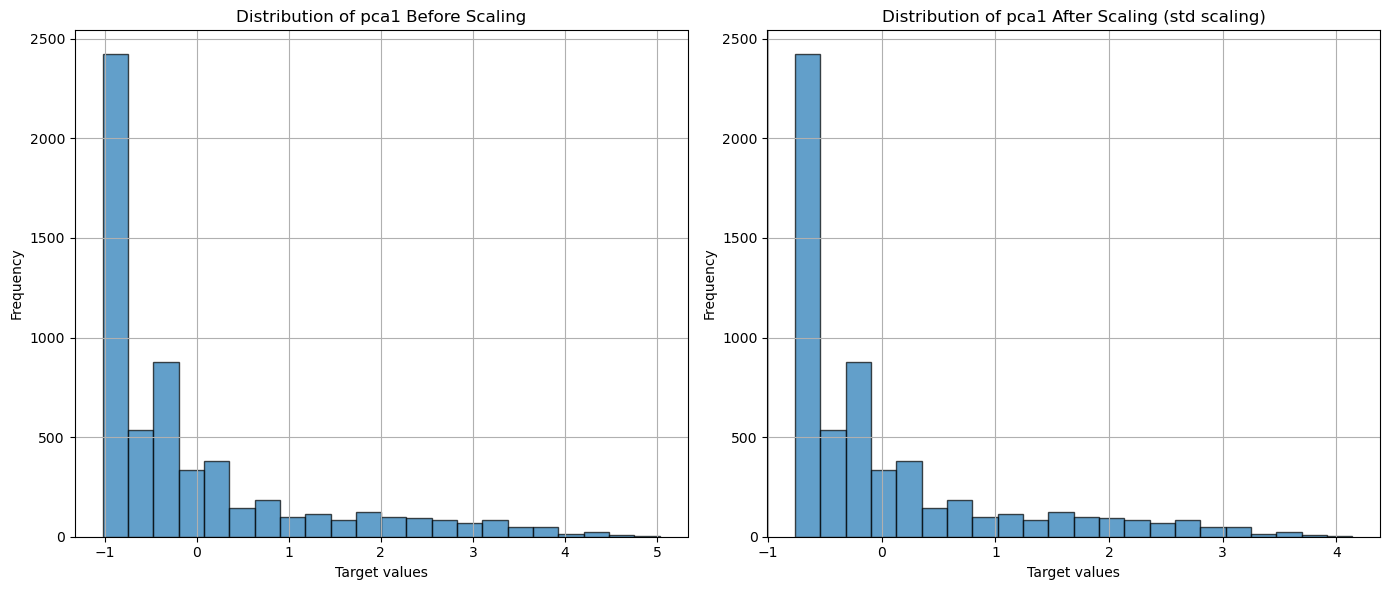

In [4]:
plot_distribution('DTI', 'pca1', 'std', bins = 22 )

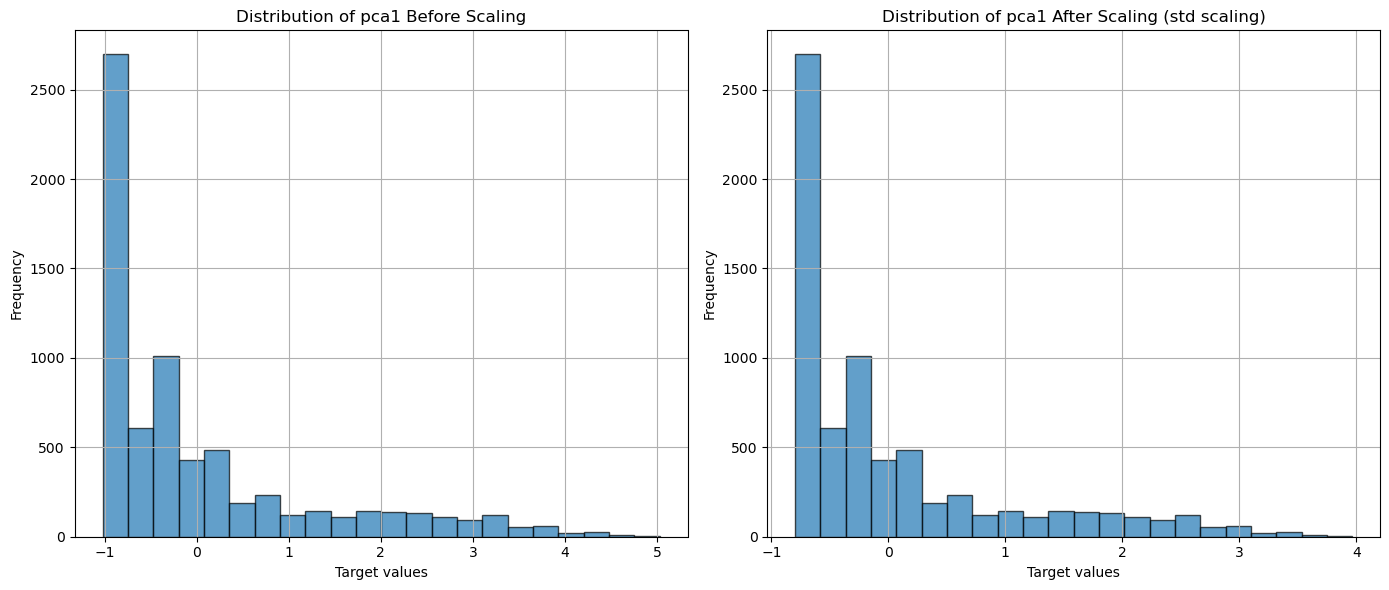

In [5]:
plot_distribution('SMRI', 'pca1', 'std', bins = 22 )